<a href="https://colab.research.google.com/github/ANACERMIR/Capstone_Project_G13/blob/main/models/Yolo/YoloV5_on_Navantia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

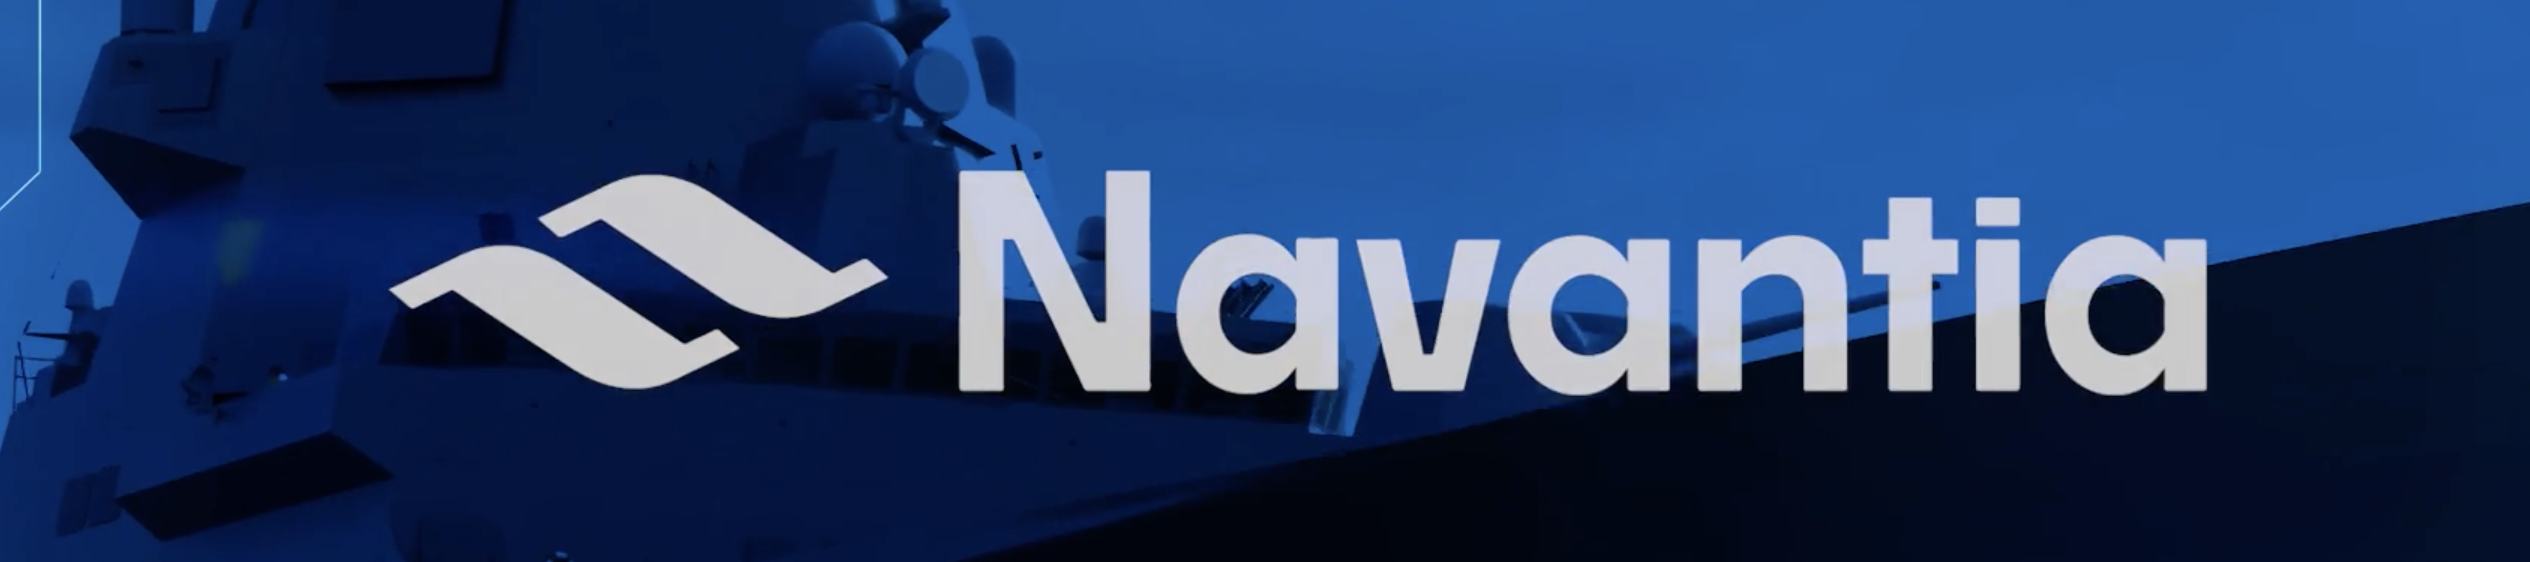

# **Yolo V5 Navantia Object Detection-- Capstone Project**

## **Set up**

In [ ]:
#clone YOLOv5 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15123, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 15123 (delta 37), reused 28 (delta 11), pack-reused 15045
Receiving objects: 100% (15123/15123), 14.19 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
#Clear ML connection 
#ClearML is a machine learning platform that helps streamline and automate the entire machine learning process. 
#In this case I use it for experiment management.
!pip install clearml
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
%env CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
env: CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz


## **Dataset input**


Roboflow is used as a tool to manage and enhance our dataset.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")


upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ny3g4ZIR8JLlIGGc8uX6")
project = rf.workspace("capstone-project-ie").project("capstone-nv")
dataset = project.version(6).download("yolov5")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Capstone-NV-6 in yolov5pytorch:: 100%|██████████| 18910/18910 [00:04<00:00, 3791.21it/s]


## **Model Training**

Here, we are able to pass a number of arguments:
- **img:** 800 image size. A large image helps to have a better performance.
- **batch:** 16 batch size. We maintain the standard.
- **epochs:** 25 epochs. After an experimentation 25 epochs are enough to process the large dataset and get good results
- **data:** Input Dataset v1 from Roboflow.
- **weights:** yolov5l.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 800 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --weights yolov5l.pt --cache --name navy5

train: weights=yolov5l.pt, cfg=, data=/content/datasets/Capstone-NV-6/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=navy5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Yolo v5 Model achieved good results with precision, recall and an average precision above 90% and 70% in an MAP 50-95 due to the opportunitties to detect helicopter and submatine. Cruises are the best detected object.

## **Results**


As we can see in the loss functions there is no overfitting in our model and it shows a downward trend. Meanwhile the metrics of MAP and precision and recall also showed the improvement of the model in the last epochs.

[Errno 2] No such file or directory: '{HOME}'
/content/yolov5


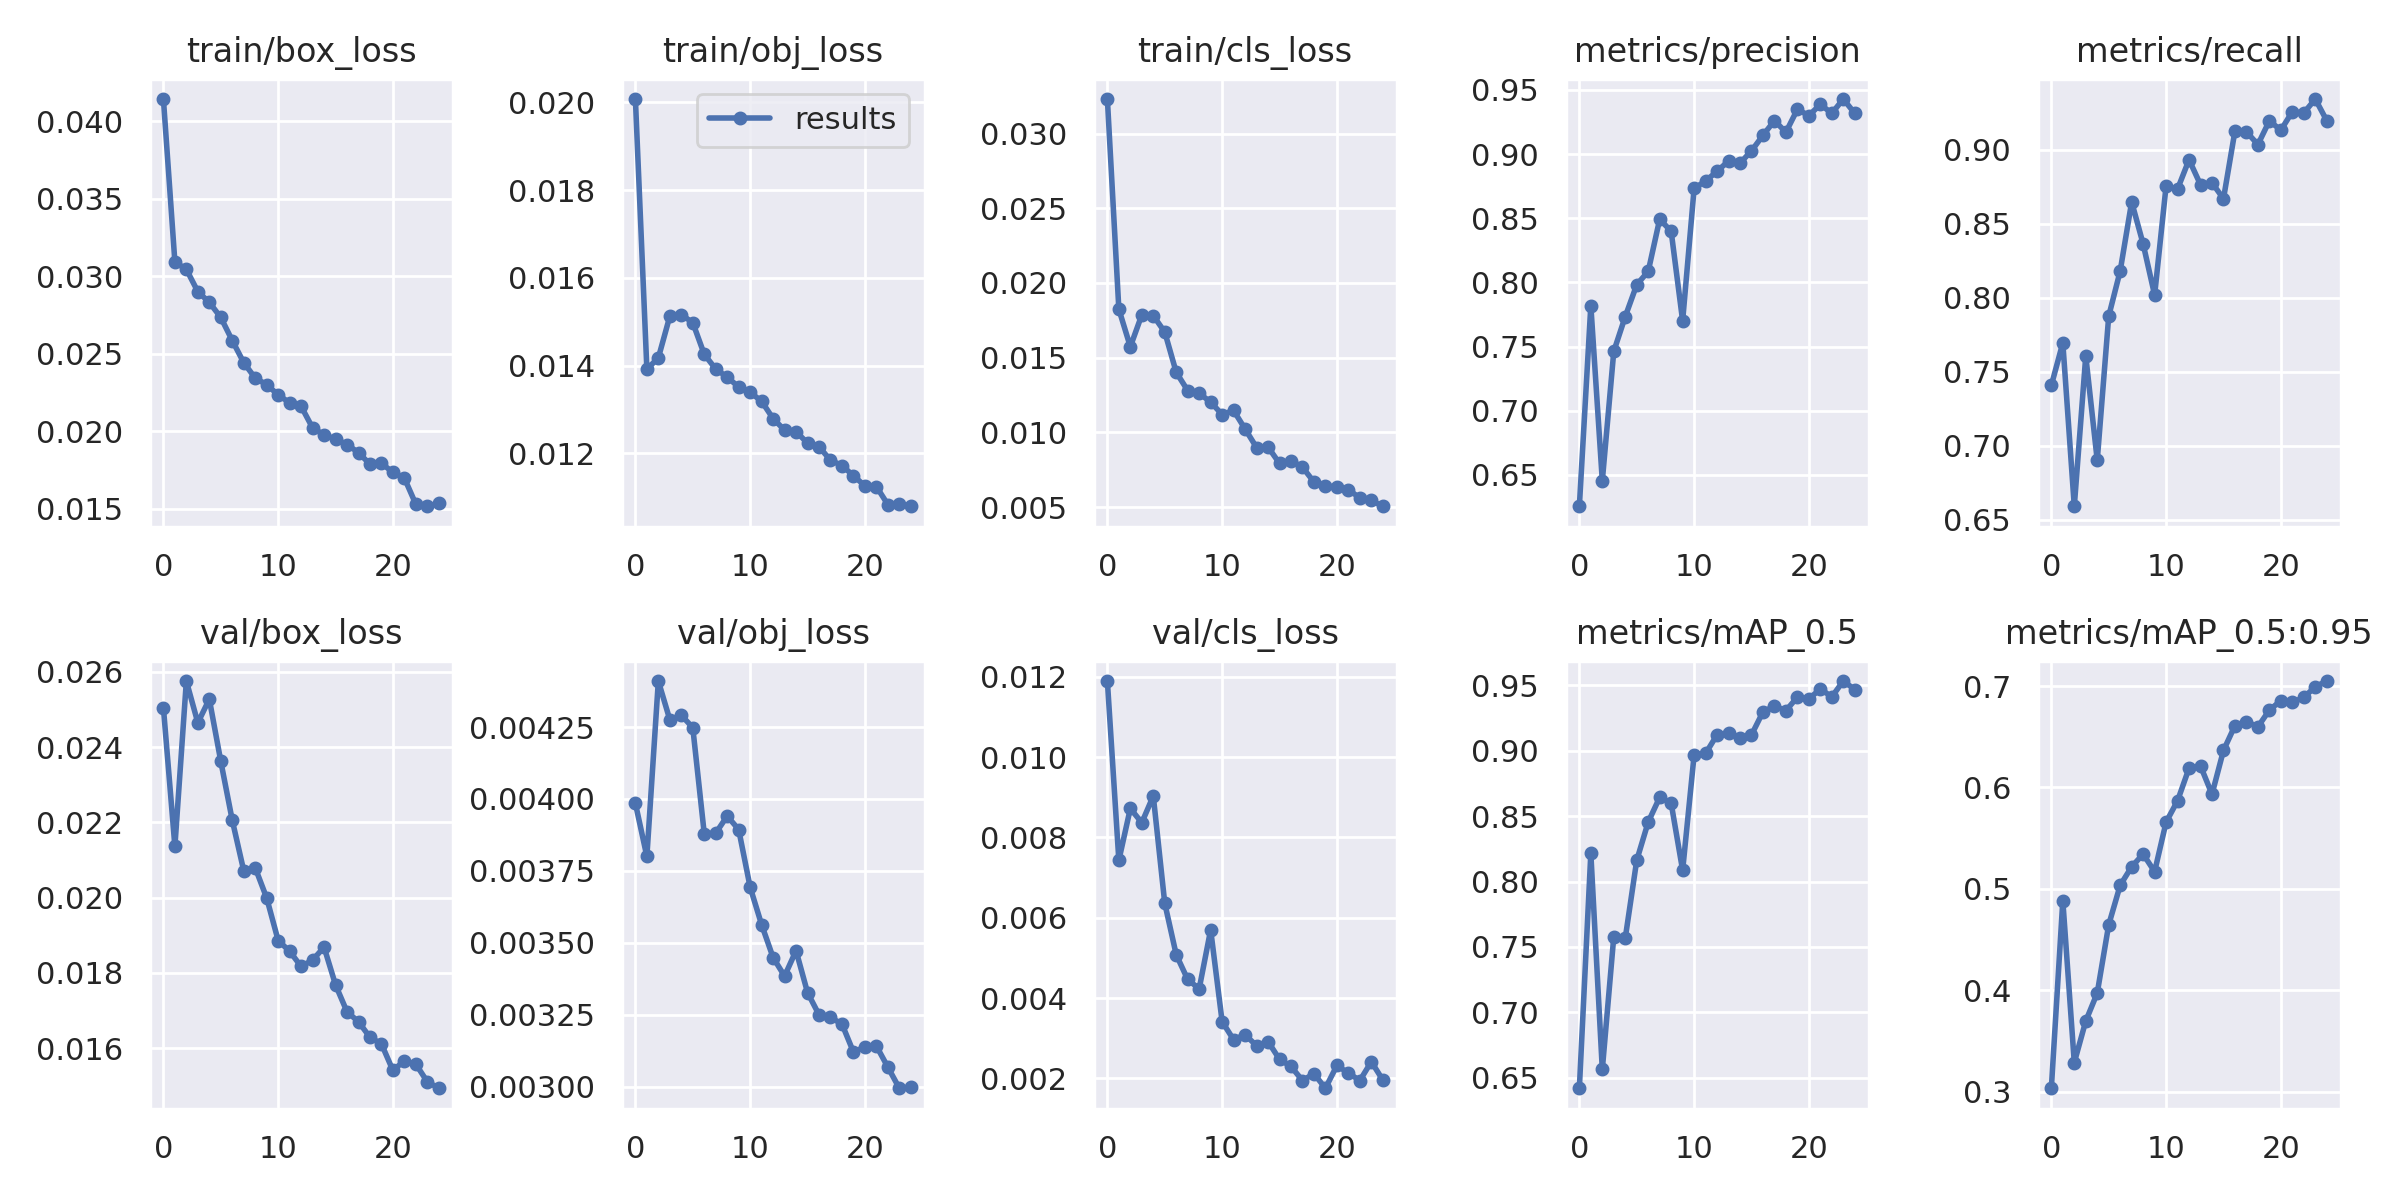

In [ ]:
from IPython.display import display, Image
%cd {HOME}
Image(filename=f"runs/train/navy5/results.png", width=600)

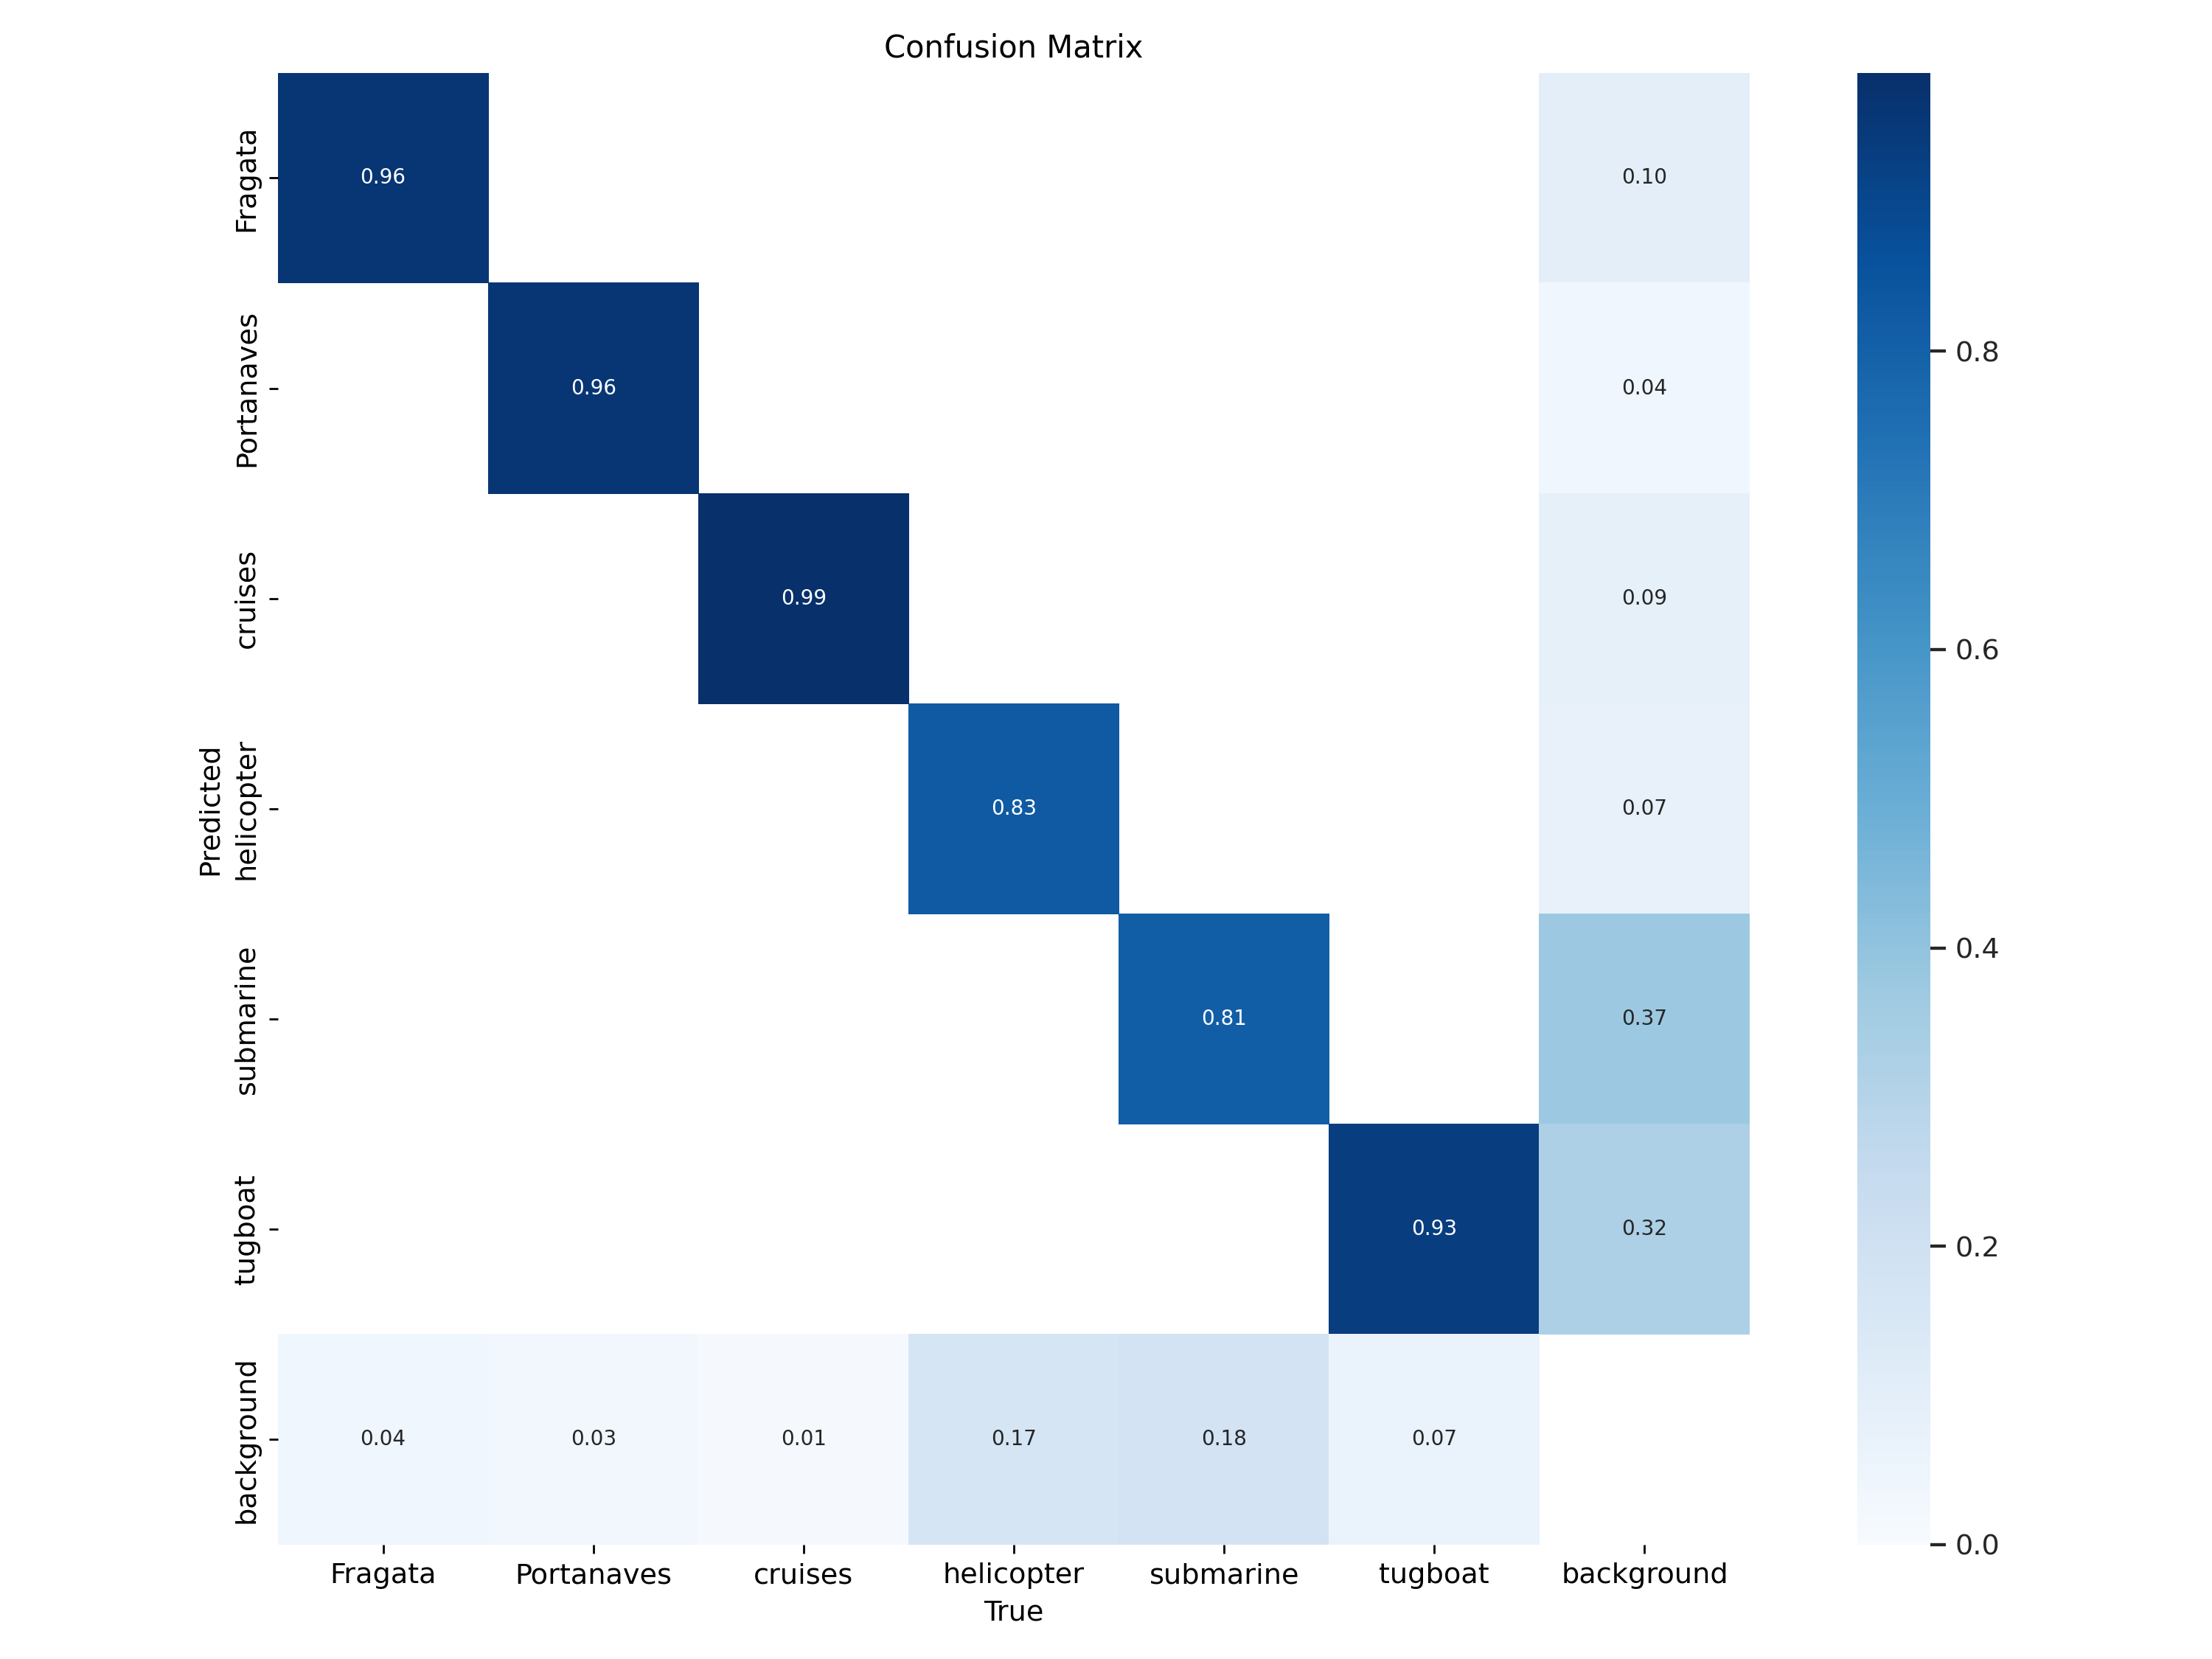

[Errno 2] No such file or directory: '{HOME}'
/content/yolov5


In [ ]:
%cd {HOME}
Image(filename=f"runs/train/navy5/confusion_matrix.png", width=600)

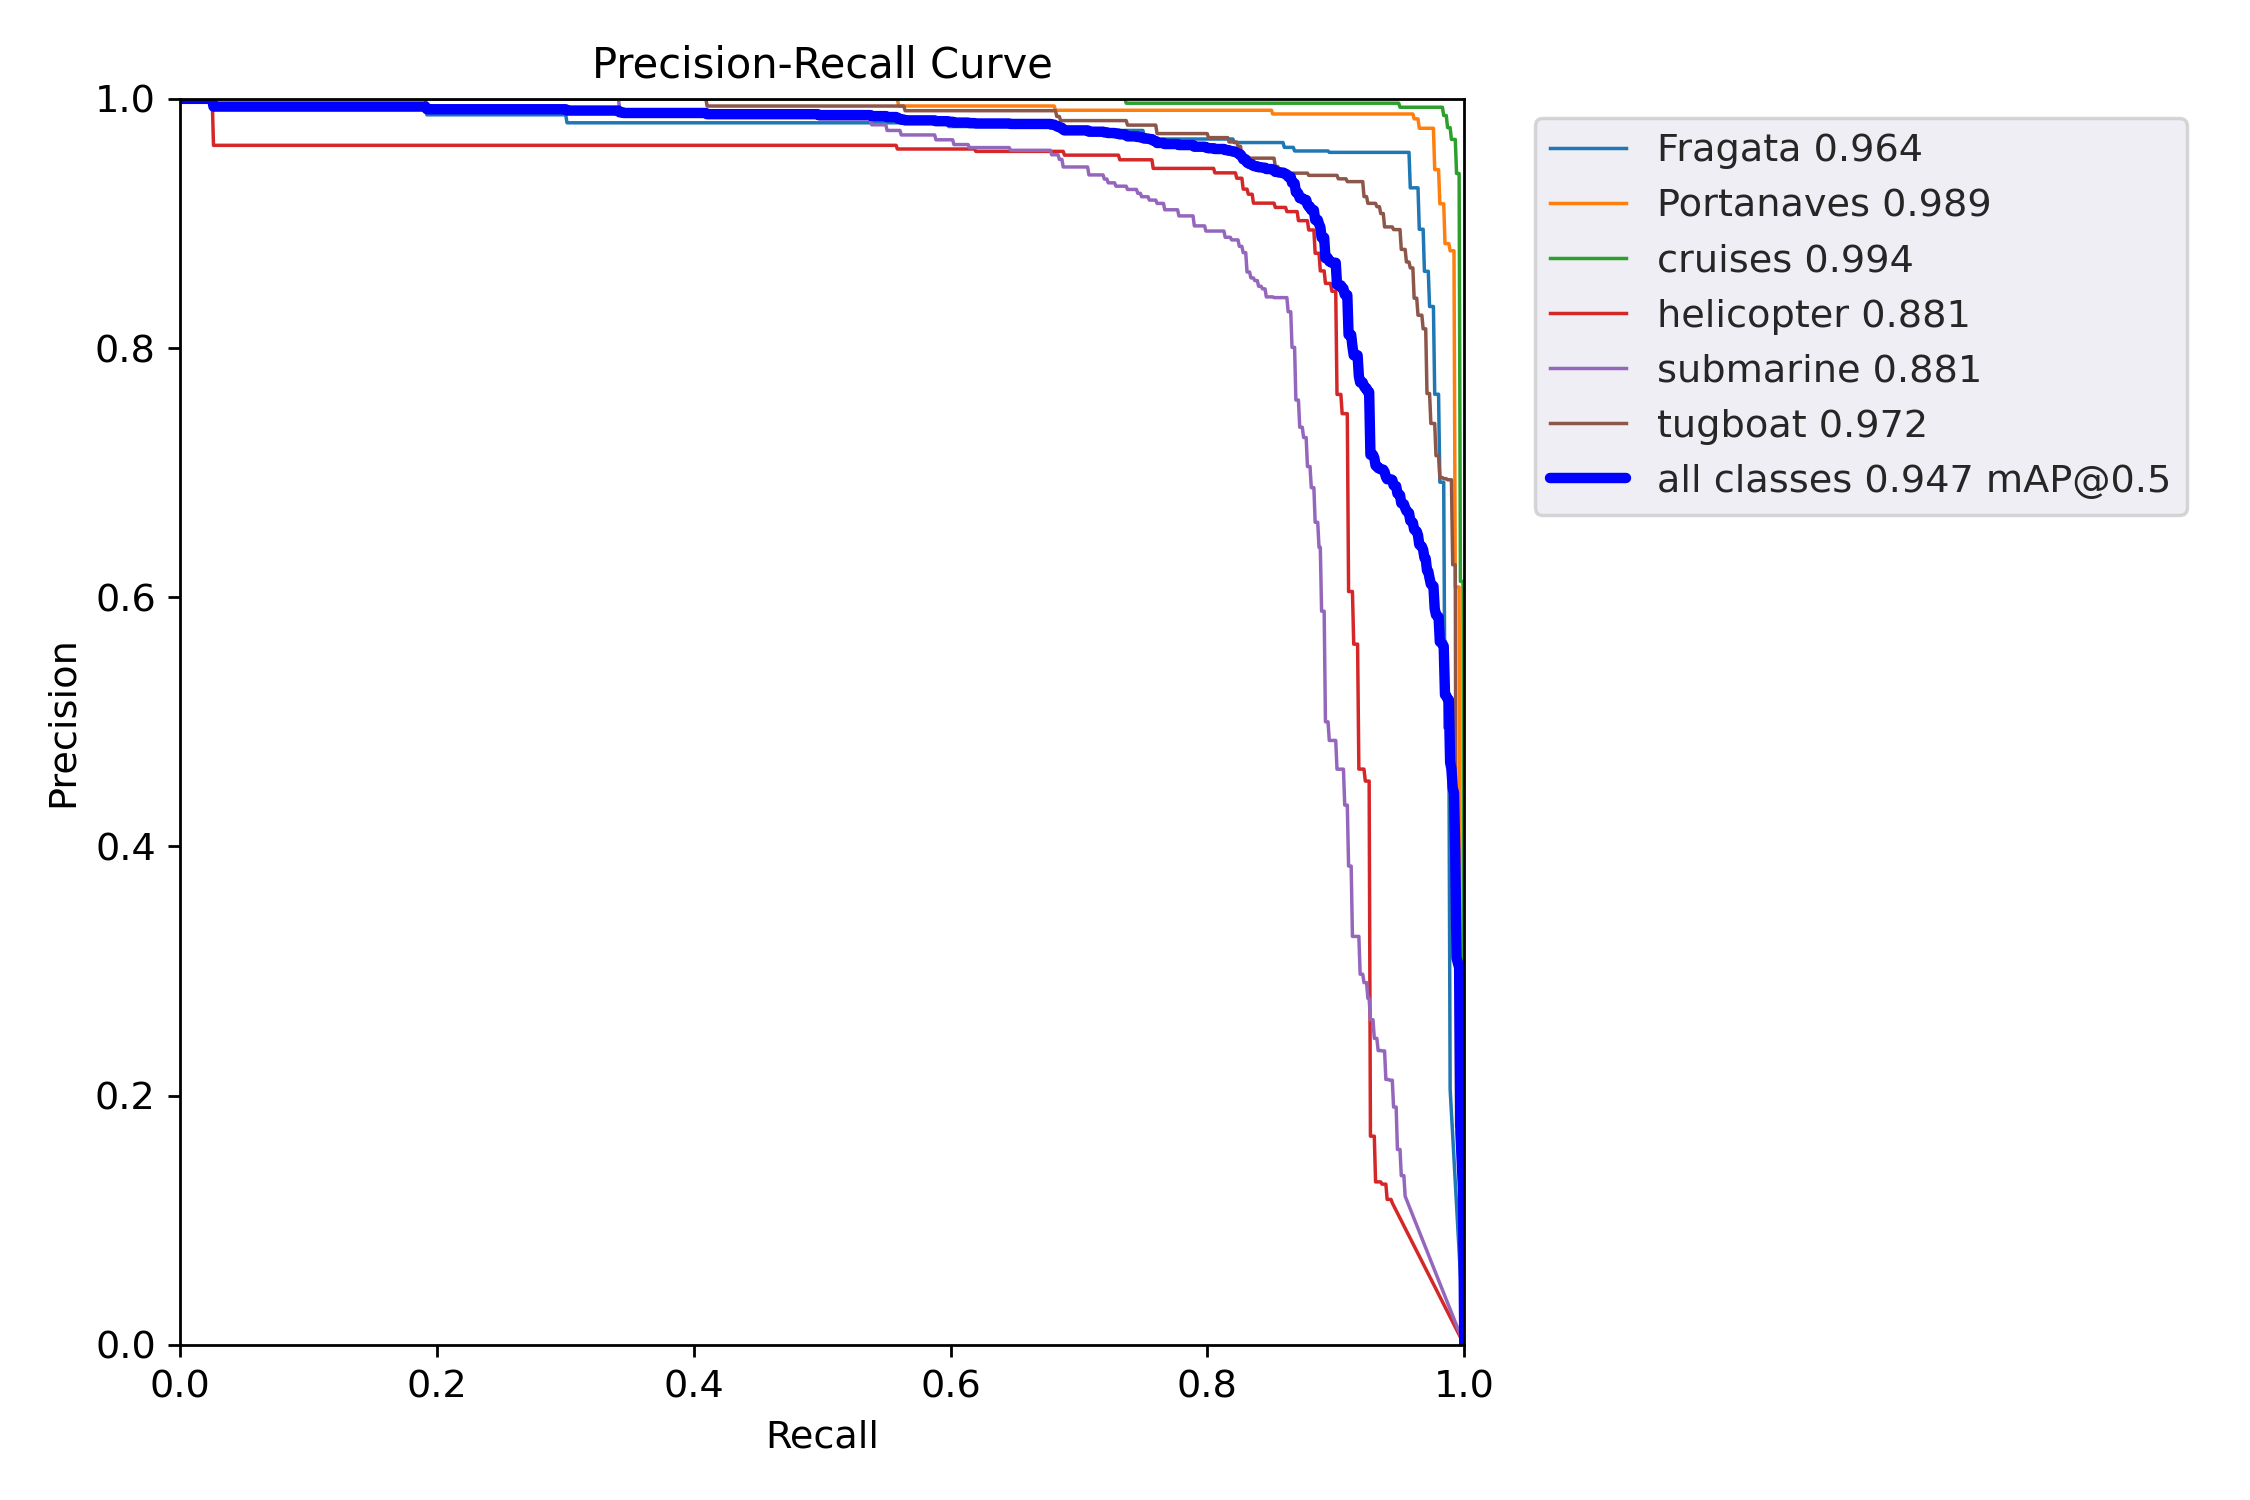

In [ ]:
Image(filename=f"runs/train/navy5/PR_curve.png", width=600)

## **Model Validation**

As shown below we had even better results in the validation.

In [ ]:
!python val.py --weights 'runs/train/navy5/weights/best.pt' --batch 64 --data '/content/datasets/Capstone-NV-6/data.yaml'  --name 'validation_on_test_datav5' --augment

val: data=/content/datasets/Capstone-NV-6/data.yaml, weights=['runs/train/navy5/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=validation_on_test_datav5, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46135203 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /content/datasets/Capstone-NV-6/valid/labels.cache... 1611 images, 0 backgrounds, 0 corrupt: 100% 1611/1611 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 26/26 [01:56<00:00,  4.47s/it]
                   all       1611       1687      0.962       0.94      0.962      0.754
               Fragata       1611        256      0.969      

## **Model Test**

In [ ]:
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/runs/train/navy5/weights/best.pt --img 416 --conf 0.4 --source /content/datasets/Capstone-NV-6/test/images

/content/yolov5
detect: weights=['/content/yolov5/runs/train/navy5/weights/best.pt'], source=/content/datasets/Capstone-NV-6/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46135203 parameters, 0 gradients, 107.7 GFLOPs
image 1/807 /content/datasets/Capstone-NV-6/test/images/00000013_jpg.rf.105c0deabe145c6222d99e4376dabe0d.jpg: 416x416 1 helicopter, 29.7ms
image 2/807 /content/datasets/Capstone-NV-6/test/images/00000030_jpg.rf.12c72571e1ad46f018beaa054b2e7b24.jpg: 416x416 1 helicopter, 29.8ms
image 3/80

## **Save Model**

In [ ]:
!zip -r runs.zip /content/yolov5/runs

from google.colab import files
files.download("/content/yolov5/runs.zip")

  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/train/ (stored 0%)
  adding: content/yolov5/runs/train/navy5/ (stored 0%)
  adding: content/yolov5/runs/train/navy5/train_batch1.jpg (deflated 3%)
  adding: content/yolov5/runs/train/navy5/R_curve.png (deflated 6%)
  adding: content/yolov5/runs/train/navy5/labels.jpg (deflated 19%)
  adding: content/yolov5/runs/train/navy5/val_batch1_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/navy5/val_batch2_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/navy5/weights/ (stored 0%)
  adding: content/yolov5/runs/train/navy5/weights/last.pt (deflated 8%)
  adding: content/yolov5/runs/train/navy5/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/navy5/train_batch0.jpg (deflated 3%)
  adding: content/yolov5/runs/train/navy5/opt.yaml (deflated 48%)
  adding: content/yolov5/runs/train/navy5/val_batch0_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/navy5/confusion_matrix.png (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>